   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.9 MB/s eta 0:00:00
Combinações que atendem pelo menos uma das condições:
k = 10.00, a = 0.0010, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0020, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0030, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0040, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0050, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0060, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0070, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0080, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0090, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
k = 10.00, a = 0.0100, Overshoot = 0.0587, Tempo de Estabilização = 4.41s
Polos do sistema: [-10.03673652+0.j          -0.98163174+0.57588268j
  -0.98163174-0.57588268j   0.        +0.j        ]
Polo 

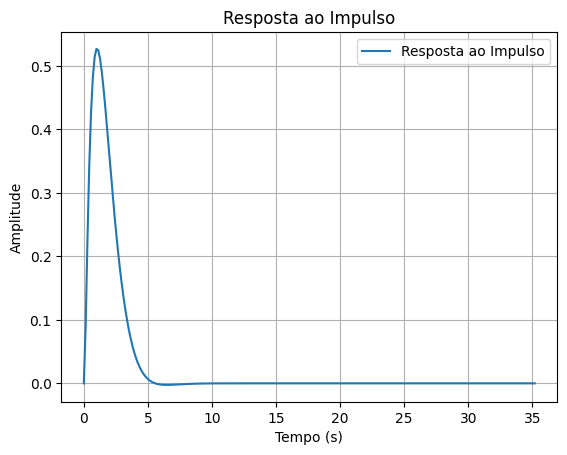

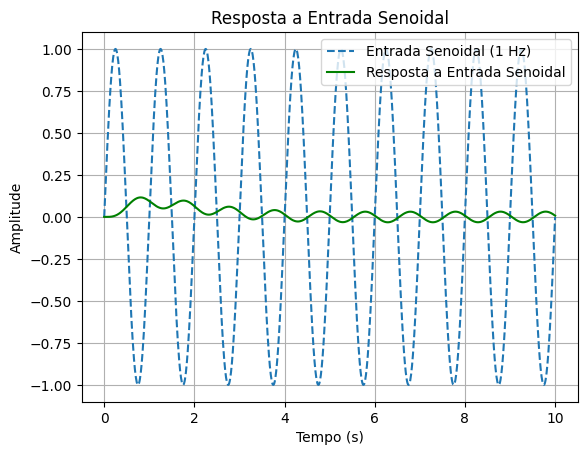

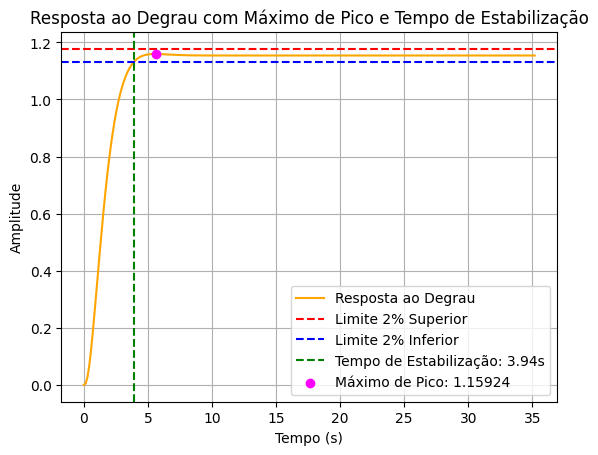

O tempo de estabilização do sistema, pelo critério dos 2%, é aproximadamente 3.94 segundos.


In [1]:
!pip install control
import matplotlib.pyplot as plt
import control as ctrl
import numpy as np

# Definir faixas de valores para k e a para a análise
k_values = np.linspace(10, 100, 20)  # Variação de k
a_values = np.linspace(0.001, 0.01, 10)  # Variação de a

# Critérios para máximo de pico e tempo de estabilização
max_overshoot_threshold = 0.1  # Máximo de pico permitido
settling_time_threshold = 1.5  # Tempo de estabilização permitido (em segundos)

# Função para calcular máximo de pico e tempo de estabilização
def analyze_system(k, a):
    numerador = [a * k, 0]
    denominador = [1, 12, 21, 10 + k, 0]
    sistema = ctrl.TransferFunction(numerador, denominador)
    t_step, y_step = ctrl.step_response(sistema)

    # Calcular o máximo de pico
    valor_final = y_step[-1]
    max_pico = np.max(y_step)
    overshoot = (max_pico - valor_final) / valor_final

    # Calcular o tempo de estabilização (critério dos 2%)
    tolerancia_superior = valor_final * 1.02
    tolerancia_inferior = valor_final * 0.98
    tempo_estabilizacao = None
    for i in range(len(y_step)):
        if np.all(y_step[i:] >= tolerancia_inferior) and np.all(y_step[i:] <= tolerancia_superior):
            tempo_estabilizacao = t_step[i]
            break

    return overshoot, tempo_estabilizacao

# Iterar sobre os valores de k e a
results = []
for k in k_values:
    for a in a_values:
        overshoot, tempo_estabilizacao = analyze_system(k, a)
        results.append((k, a, overshoot, tempo_estabilizacao))

# Filtrar os resultados que atendem às condições
valid_results = [
    (k, a, overshoot, tempo_estabilizacao)
    for k, a, overshoot, tempo_estabilizacao in results
    if (tempo_estabilizacao and tempo_estabilizacao < settling_time_threshold) or (overshoot < max_overshoot_threshold)
]

# Exibir os resultados que atendem pelo menos uma das condições
if valid_results:
    print("Combinações que atendem pelo menos uma das condições:")
    for k, a, overshoot, tempo_estabilizacao in valid_results:
        print(f"k = {k:.2f}, a = {a:.4f}, Overshoot = {overshoot:.4f}, Tempo de Estabilização = {tempo_estabilizacao:.2f}s")
else:
    print("Nenhuma combinação atende simultaneamente às condições.")

# Definir a função de transferência com valores padrão
k = 3 # valor de k
a = 5 # valor de a
numerador = [(a*k)*1, 0]
denominador = [1, 12, 21, 10 + k, 0]

sistema = ctrl.TransferFunction(numerador, denominador)

# Gerar a resposta ao impulso
t_impulse, y_impulse = ctrl.impulse_response(sistema)

# Gerar a resposta ao degrau
t_step, y_step = ctrl.step_response(sistema)

# Gerar a resposta a uma entrada senoidal
t_senoidal = np.linspace(0, 10, 1000)  # Intervalo de tempo
entrada_senoidal = np.sin(2 * np.pi * 1 * t_senoidal)  # Sinal senoidal de frequência 1Hz
t_out, y_senoidal = ctrl.forced_response(sistema, T=t_senoidal, U=entrada_senoidal) # Resposta forçada

# Calcular os polos do sistema
polos = ctrl.poles(sistema)

# Filtrar apenas os polos reais
polos_reais = [polo for polo in polos if np.isreal(polo)]

# Encontrar os polos dominantes (os que têm a menor parte real)
if polos_reais:
    polos_ordenados = sorted(polos_reais, key=lambda p: np.real(p))
    polo_dominante = polos_ordenados[0]  # Considerando o polo dominante como o de menor parte real

    # Calcular o coeficiente de amortecimento (ζ) e a frequência natural (ωn)
    frequencia_natural = np.abs(polo_dominante)  # ωn = |polo|
    if frequencia_natural != 0:
        coeficiente_amortecimento = -np.real(polo_dominante) / frequencia_natural  # ζ = -Re(polo) / ωn
    else:
        coeficiente_amortecimento = np.nan  # Definir como NaN se a frequência natural for 0

    # Determinar o tipo de amortecimento
    if coeficiente_amortecimento > 1:
        tipo_amortecimento = 'Superamortecido'
    elif coeficiente_amortecimento == 1:
        tipo_amortecimento = 'Criticamente amortecido'
    elif 0 < coeficiente_amortecimento < 1:
        tipo_amortecimento = 'Subamortecido'
    elif np.isnan(coeficiente_amortecimento):
        tipo_amortecimento = 'Não aplicável (frequência natural zero)'
    else:
        tipo_amortecimento = 'Não amortecido'
else:
    polo_dominante = None
    coeficiente_amortecimento = np.nan
    tipo_amortecimento = 'Não aplicável (sem polos reais)'

# Calcular o máximo de pico (overshoot)
valor_final = y_step[-1]
max_pico = np.max(y_step)
overshoot = (max_pico - valor_final) / valor_final * 100

# Exibir os resultados
print(f"Polos do sistema: {polos}")
if polo_dominante is not None:
    print(f"Polo dominante: {polo_dominante}")
    print(f"Coeficiente de amortecimento (ζ): {coeficiente_amortecimento:.4f}")
    print(f"Frequência natural (ωn): {frequencia_natural:.4f}")
    print(f"Tipo de amortecimento: {tipo_amortecimento}")
else:
    print("Não foi possível determinar o tipo de amortecimento devido à falta de polos reais.")

print(f"Máximo de pico (overshoot): {overshoot:.2f}%")

# Calcular o tempo de estabilização (critério dos 2%)
valor_final = y_step[-1]
tolerancia_superior = valor_final * 1.02
tolerancia_inferior = valor_final * 0.98

# Encontrar o tempo em que a resposta entra na faixa de 2% e permanece nela
tempo_estabilizacao = None
for i in range(len(y_step)):
    if np.all(y_step[i:] >= tolerancia_inferior) and np.all(y_step[i:] <= tolerancia_superior):
        tempo_estabilizacao = t_step[i]
        break

# Plotar a resposta ao impulso
plt.figure()
plt.plot(t_impulse, y_impulse, label='Resposta ao Impulso')
plt.title('Resposta ao Impulso')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plotar a resposta a entrada senoidal
plt.figure()
plt.plot(t_senoidal, entrada_senoidal, '--', label='Entrada Senoidal (1 Hz)')
plt.plot(t_out, y_senoidal, label='Resposta a Entrada Senoidal', color='green')
plt.title('Resposta a Entrada Senoidal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plotar a resposta ao degrau com a indicação do tempo de estabilização e o máximo de pico
plt.figure()
plt.plot(t_step, y_step, label='Resposta ao Degrau', color='orange')
plt.axhline(y=tolerancia_superior, color='red', linestyle='--', label='Limite 2% Superior')
plt.axhline(y=tolerancia_inferior, color='blue', linestyle='--', label='Limite 2% Inferior')
plt.axvline(x=tempo_estabilizacao, color='green', linestyle='--', label=f'Tempo de Estabilização: {tempo_estabilizacao:.2f}s')
plt.scatter(t_step[np.argmax(y_step)], max_pico, color='magenta', zorder=5, label=f'Máximo de Pico: {max_pico:.5f}')
plt.title('Resposta ao Degrau com Máximo de Pico e Tempo de Estabilização')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Mostrar os gráficos
plt.show()

if tempo_estabilizacao:
    print(f"O tempo de estabilização do sistema, pelo critério dos 2%, é aproximadamente {tempo_estabilizacao:.2f} segundos.")
else:
    print("O sistema não se estabilizou dentro da tolerância especificada.")
